# Линейная регрессия

## Теория

Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.

Пусть есть некоторый числовой целевой признак $y$. Извеcтны признаки $X = [x_1, x_2, ... ,x_m]$. Модель регрессии предсказывает $y$ с помощью вычисления следующей взвешенной суммы $y = w_0 + \sum_{i=1}^{m}{w_i x_i}$. Добавив фиктивный признак $x_0 = 1$, можно будет записать $y = \sum_{i=0}^m w_i x_i = \vec{w}^T \vec{x}$. Если представить себе X как матрицу объектов-признаков, y - вектор столбец целевой переменной, а w - вектор-столбец коэффициентов, то получим матричную цапись: $$\Large \vec{y} = X\vec{w}$$

Один из способов вычислить значения параметров модели является метод наименьших квадратов (МНК), который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью:
$$
\large
\begin{array}
{rcl}\mathcal{L}\left(X, \vec{y}, \vec{w} \right) &=& \frac{1}{2n} \sum_{i=1}^n \left(y_i - \vec{w}^T \vec{x}_i\right)^2 \\
&=& \frac{1}{2n} \left\| \vec{y} - X \vec{w} \right\|_2^2 \\
&=& \frac{1}{2n} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right)
\end{array}
$$

Для решения данной оптимизационной задачи необходимо вычислить производные по параметрам модели, приравнять их к нулю и решить полученные уравнения относительно $\vec w$ (частный случай был в лекции):

$$
\large
\begin{array}
{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right) = 0 \\
&\Leftrightarrow& -X^T \vec{y} + X^T X \vec{w} = 0 \\
&\Leftrightarrow& X^T X \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \vec{w} = \left(X^T X\right)^{-1} X^T \vec{y}
\end{array}
$$

### Нормальное уравнение

Таким образом для аналитического вычисления весов линейной регрессии нужно решить это нормальное уравнение: $$\Large \vec{w} = \left(X^T X\right)^{-1} X^T \vec{y}$$

Матрица ${(X^TX)}^{-1}X^T$ - [псевдообратная](https://ru.wikipedia.org/wiki/%D0%9F%D1%81%D0%B5%D0%B2%D0%B4%D0%BE%D0%BE%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).
Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). На практике лучше находить вектор весов $w$ решением матричного уравнения $$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).
Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

### Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска. Градиентный шаг для весов будет выглядеть следующим образом: $$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$ Здесь $\eta$ - параметр, шаг градиентного спуска.

### Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки: $$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$ где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

#### Литература 
- [Первый конспект лекции про линейную регрессию из курса ФШЭ](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture02-linregr.pdf)
- [Второй конспект лекции про линейную регрессию из курса ФШЭ](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture03-linregr.pdf)
- [Теория из курса ODS](https://github.com/Yorko/mlcourse_open/blob/master/jupyter_notebooks/topic04_linear_models/topic4_linear_models_part1_mse_likelihood_bias_variance.ipynb)
- [Материалы из курса от МФТИ](https://www.coursera.org/specializations/machine-learning-data-analysis)


В домашнем задании надо будет вычислить всё **вручную** методом нормального уравнения.

![](https://ebanoe.it/wp-content/uploads/2016/03/alkogolik-question-how-to-live.jpg)

## Практика

В этом заданиии мы будем использовать данные [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) по росту и весу 25 тысяч подростков.

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [15]:
METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462

df = pd.read_csv('../../data/weights_heights.csv.gz', index_col='Index')
df['Height'] = df['Height'] / METER_TO_INCH
df['Weight'] = df['Weight'] / KILO_TO_POUND
df.head()

,Height,Weight
Index,,
1,1.670899,51.252597
2,1.816490,61.909672
3,1.762732,69.411917
4,1.732705,64.562328
5,1.721814,65.452141


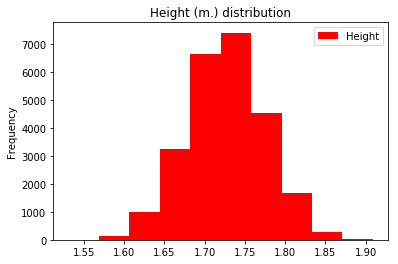

In [19]:
# Гистограмма роста
df.plot(y='Height', kind='hist', 
        color='red',  title='Height (m.) distribution')

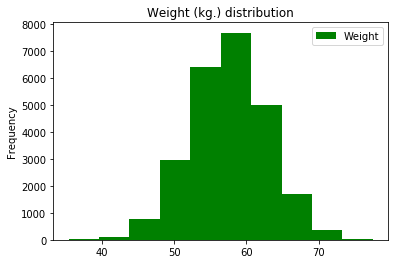

In [18]:
# Гистограмма веса
df.plot(y='Weight', kind='hist', 
        color='green',  title='Weight (kg.) distribution')

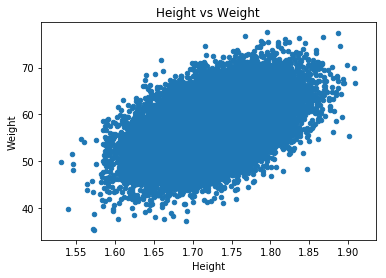

In [20]:
df.plot(kind='scatter', y='Weight', x='Height', title='Height vs Weight')

### Среднеквадратичная ошибка

В простейшей постановке задача прогноза значения вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной функции ошибки.

В нашем случае у нас 2 признака поэтому будет два параметра $w_0$ и $w_1$

$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$

In [21]:
def error(x0, x1, w0, w1):
    return sum(map(lambda xi, yi: ((yi - (w0 + w1 * xi))**2), x0, x1))

In [87]:
weight, height = df['Weight'], df['Height']
print(error(weight,height, 1.3, 0.006))
print(error(weight,height, 0.6, 0.02))

209.696707597
226.277467799


Нарисуем на scatter plot эти две прямые, чтобы посмотреть как они улавливают закономерность.

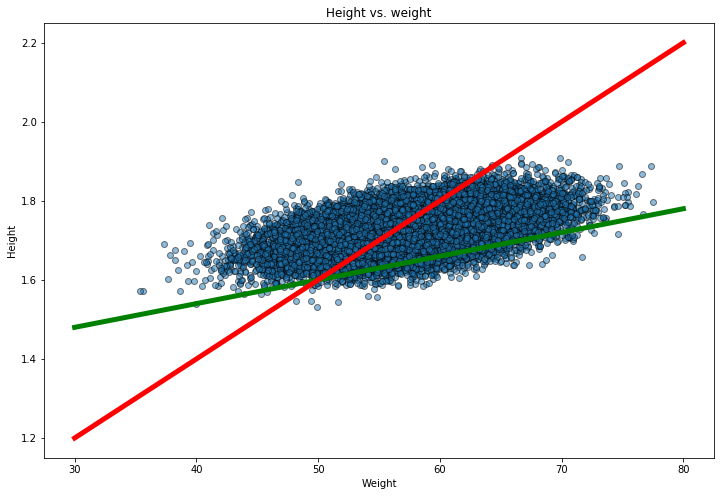

In [91]:
plt.figure(figsize=(12,8))
plt.scatter(x=weight, y=height, edgecolors='black', alpha=0.5)
plt.title('Height vs. weight')
plt.xlabel('Weight')
plt.ylabel('Height')
x = np.linspace(start=30.0, stop=80.0, num=100)
plt.plot(x, 1.3 + 0.006 * x, c='green', linewidth=5)
plt.plot(x, 0.6 + 0.02 * x, c='red', linewidth=5)

Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Посмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

Text(0.5,1,'error vs. w1 for w0=50')

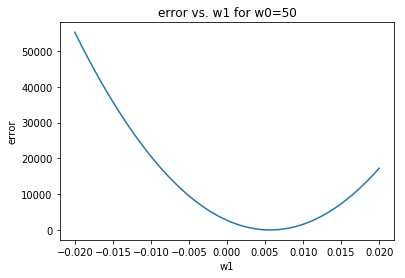

In [105]:
x = np.linspace(start=-0.02, stop=0.02, num=100)
y = error(weight, height, 1.4, x)
plt.plot(x, y)
plt.xlabel('w1')
plt.ylabel('error')
plt.title('error vs. w1 for w0=50')

Найдем оптимальное значение для $w_1$ при фиксированном $w_0 = 1.5$. Для этого воспользуемся методом `minimize_scalar`.

In [117]:
from scipy.optimize import minimize_scalar
w0 = 1.1
w1_opt = minimize_scalar(
    fun=lambda x: error(weight, height, w0, x), 
    bounds=(-0.2, 0.2)).x
w1_opt

0.010825437010092457

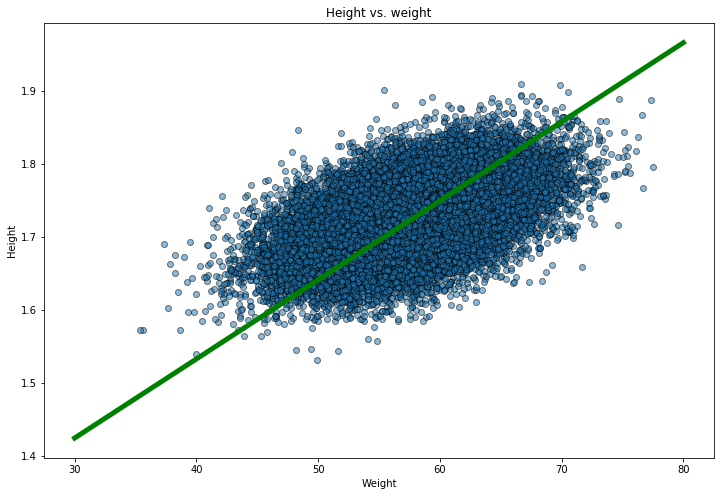

In [118]:
plt.figure(figsize=(12,8))

plt.scatter(x=weight, y=height, edgecolors='black', alpha=0.5)
plt.title('Height vs. weight')
plt.xlabel('Weight')
plt.ylabel('Height')

x = np.linspace(start=30.0, stop=80.0, num=100)
plt.plot(x, w0 + w1_opt * x, c='green', linewidth=5)

В прошлых графиках мы фиксировали $w_0$ и рисовали двумерные график ошибок. Но по сути мы должны перебирать и $w_0$ и $w_1$, а это трёхмерный графки. Его тоже можно визулизировать.

Text(0.5,0,'Error')

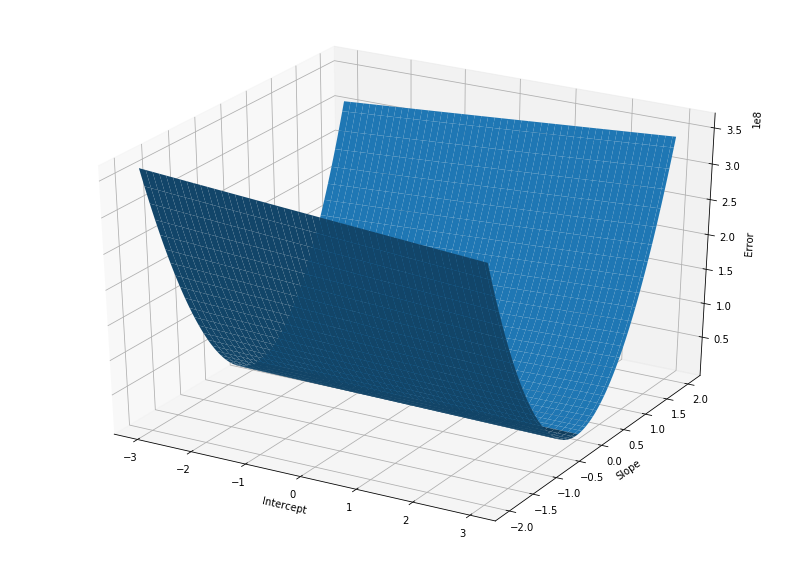

In [119]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14,10))
ax = fig.gca(projection='3d') # get current axis

w0 = np.linspace(start=-3, stop=3, num=100)
w1 = np.linspace(start=-2, stop=2, num=100)
w0, w1 = np.meshgrid(w0, w1)
z = error(weight, height, w0, w1)

ax.plot_surface(w0, w1, z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')

Теперь найдем минимум функции ошибки по трехмерной функции с помощью метода `minimize` и оптимизатора `L-BFGS-B`.

In [120]:
from scipy.optimize import minimize

(w0_opt, w1_opt) = minimize(
    fun=lambda x: error(weight, height, x[0], x[1]), 
    x0=(0, 0), 
    bounds=((-3, 3), (-2, 2)), 
    method='L-BFGS-B').x
w0_opt, w1_opt

(1.4623581721325254, 0.0045915976548781988)

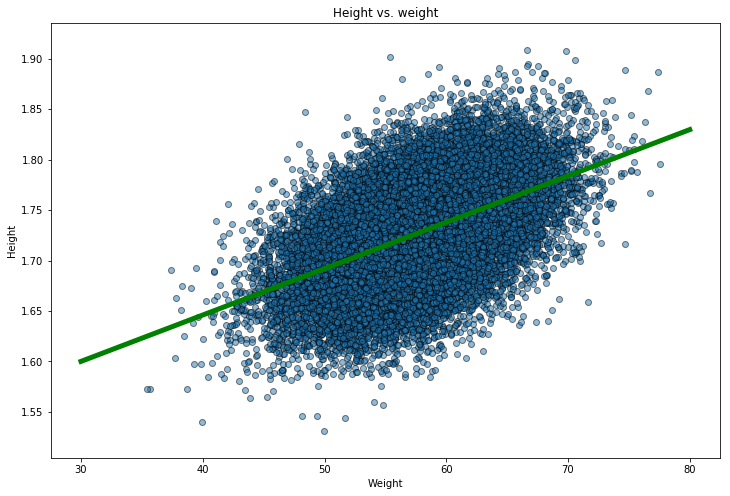

In [121]:
plt.figure(figsize=(12,8))

plt.scatter(x=weight, y=height, edgecolors='black', alpha=0.5)
plt.title('Height vs. weight')
plt.xlabel('Weight')
plt.ylabel('Height')

x = np.linspace(start=30.0, stop=80.0, num=100)
plt.plot(x, w0_opt + w1_opt * x, c='green', linewidth=5)

## Регуляризация Lasso и Ridge